In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [3]:
url='https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=True'
df=pd.read_excel(url,sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [5]:
description=pd.read_excel(url,sheet_name='Data Dict', header=1,usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [6]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [7]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [9]:
df.Churn.value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

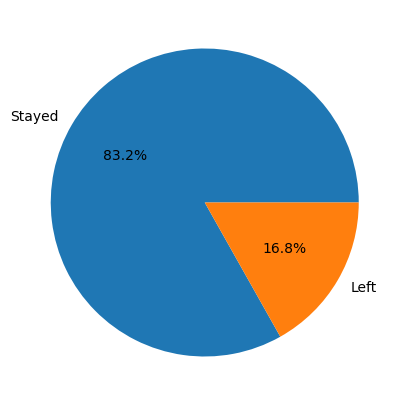

In [10]:
churn_rate=df.Churn.value_counts()/len(df)*100
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Stayed',"Left"], autopct="%1.1f%%")
plt.show()

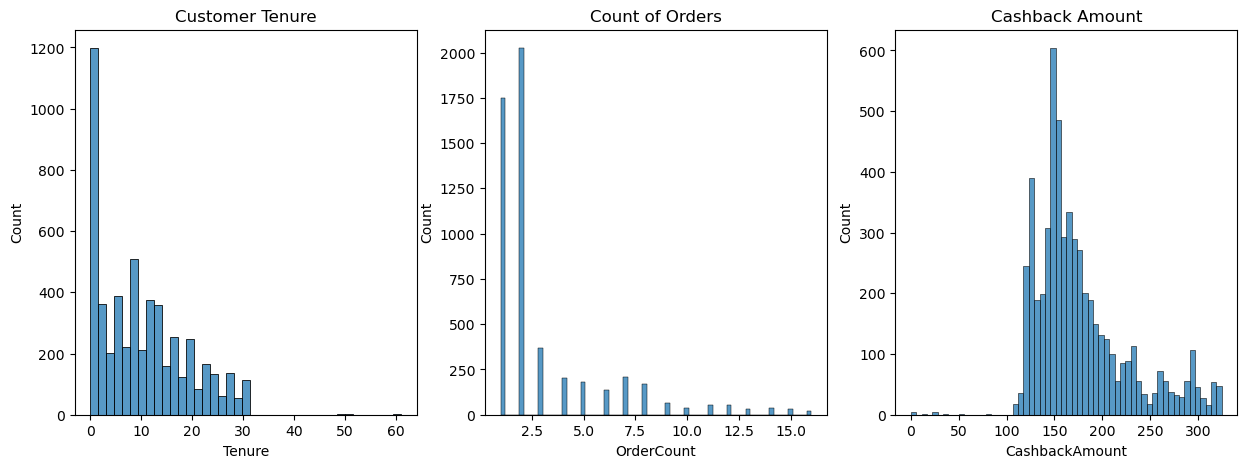

In [11]:
fig, axes=plt.subplots(1,3,figsize=(15,5))

sns.histplot(df,x='Tenure',ax=axes[0])
axes[0].set_title("Customer Tenure")

sns.histplot(df,x='OrderCount',ax=axes[1])
axes[1].set_title("Count of Orders")

sns.histplot(df,x='CashbackAmount',ax=axes[2])
axes[2].set_title("Cashback Amount")

plt.show()

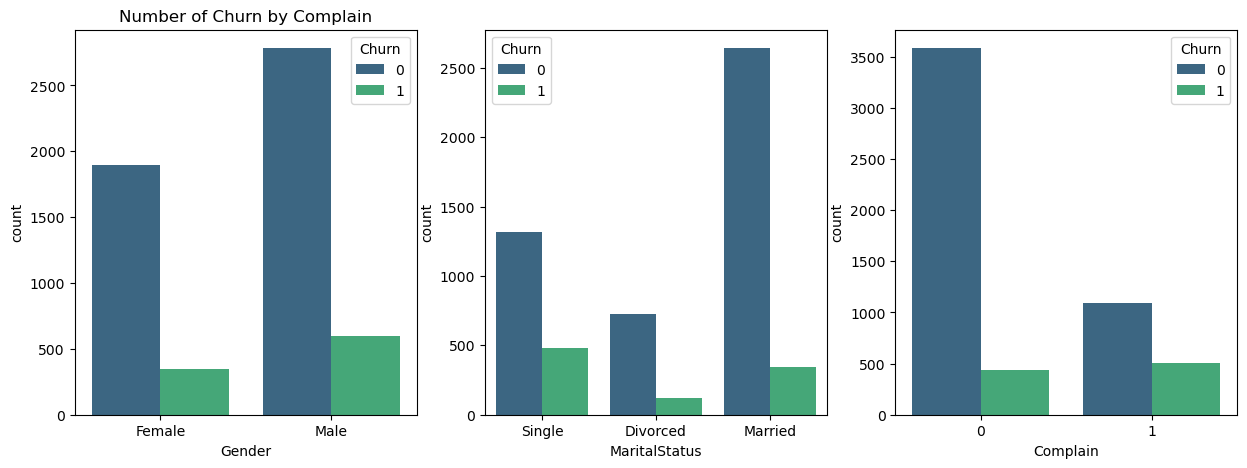

In [12]:
fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.countplot(df,x='Gender',hue='Churn',palette='viridis',ax=axes[0])
axes[0].set_title("Number of Churn by Gender")

sns.countplot(df,x='MaritalStatus',hue='Churn',palette='viridis',ax=axes[1])
axes[0].set_title("Number of Churn by MaritalStatus")

sns.countplot(df,x='Complain',hue='Churn',palette='viridis',ax=axes[2])
axes[0].set_title("Number of Churn by Complain")

plt.show()

In [13]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [14]:
list(df)

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [15]:
cols=[
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']
df[cols].corrwith(df.Churn).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

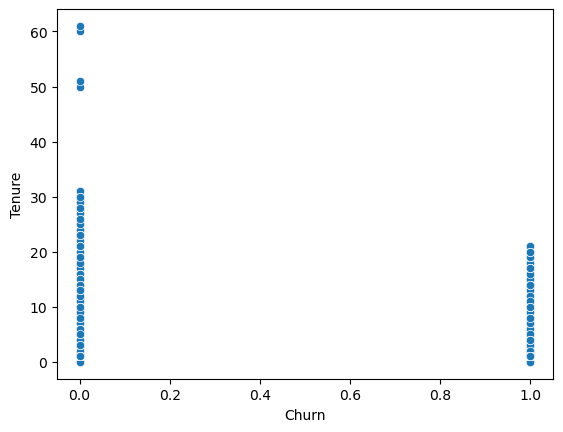

In [16]:
sns.scatterplot(df,x='Churn',y='Tenure')
plt.show()

In [17]:
print(f'Count of NaN: {df.isnull().sum().sum()}')
print(f'Count of missing raws: {df[df.isnull().any(axis=1)].shape[0]}')
print(f'Percent of missing raws: {np.round(df[df.isnull().any(axis=1)].shape[0]/len(df)*100)}%')

Count of NaN: 1856
Count of missing raws: 1856
Percent of missing raws: 33.0%


In [18]:
data=df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]
print(f'Count of NaN: {data.isnull().sum().sum()}')
print(f'Count of missing raws: {data[data.isnull().any(axis=1)].shape[0]}')
print(f'Percent of missing raws: {np.round(data[data.isnull().any(axis=1)].shape[0]/len(df)*100)}%')

Count of NaN: 571
Count of missing raws: 571
Percent of missing raws: 10.0%


In [19]:
data=data.dropna()
data.shape

(5059, 7)

In [20]:
data.replace({'Single':1,'Divorced':3,'Married':2}, inplace=True)

In [21]:
data.MaritalStatus.value_counts()

MaritalStatus
2    2681
1    1612
3     766
Name: count, dtype: int64

In [22]:
data.Churn.value_counts()/len(data)

Churn
0    0.839296
1    0.160704
Name: count, dtype: float64

In [23]:
data.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus,Gender
0,1,4.0,1,5.0,159.93,1,Female
3,1,0.0,0,3.0,134.07,1,Male
4,1,0.0,0,3.0,129.60,1,Male
5,1,0.0,1,7.0,139.19,1,Female
8,1,13.0,1,2.0,126.83,3,Male


# Preparing for ML

In [24]:
encoded=pd.get_dummies(data)
encoded.replace({True:1,False:0},inplace=True)

In [25]:
encoded.corrwith(encoded.Churn).abs().sort_values(ascending=False)

Churn                1.000000
Tenure               0.353464
Complain             0.245175
CashbackAmount       0.153990
DaySinceLastOrder    0.149229
MaritalStatus        0.138459
Gender_Female        0.023885
Gender_Male          0.023885
dtype: float64

In [26]:
X=encoded.drop(['Churn','Gender_Female'],axis=1)
y=encoded.Churn.copy()
X

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus,Gender_Male
0,4.0,1,5.0,159.93,1,0
3,0.0,0,3.0,134.07,1,1
4,0.0,0,3.0,129.60,1,1
5,0.0,1,7.0,139.19,1,0
8,13.0,1,2.0,126.83,3,1
...,...,...,...,...,...,...
5624,1.0,0,1.0,154.66,1,0
5625,10.0,0,4.0,150.71,2,1
5627,1.0,1,4.0,186.42,2,1
5628,23.0,0,9.0,178.90,2,1


In [27]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
X_train

array([[ 0.80532591,  1.57764556,  1.18097278,  0.52837434,  0.25150755,
         0.81764028],
       [-0.12817402, -0.63385593, -1.00330335, -0.57330928,  0.25150755,
         0.81764028],
       [-0.59492399, -0.63385593,  0.90793826, -0.48058526, -1.25248382,
         0.81764028],
       ...,
       [-1.06167396,  1.57764556, -0.45723432, -0.65462111,  1.75549893,
         0.81764028],
       [-1.06167396,  1.57764556, -0.73026884, -0.44757143,  0.25150755,
         0.81764028],
       [-0.82829897, -0.63385593, -0.73026884, -0.97232824, -1.25248382,
         0.81764028]])

# Logistic Regression

In [29]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       849
           1       0.74      0.43      0.54       163

    accuracy                           0.88      1012
   macro avg       0.82      0.70      0.74      1012
weighted avg       0.87      0.88      0.87      1012

Model Accuracy:  0.8843873517786561


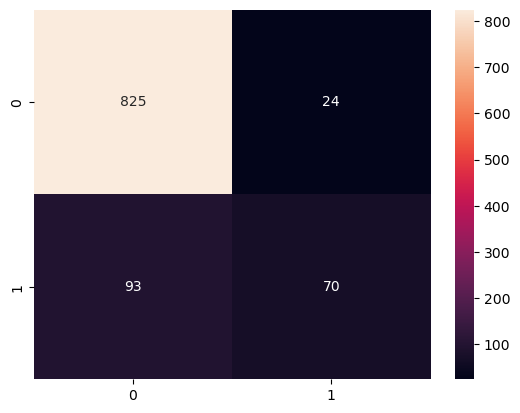

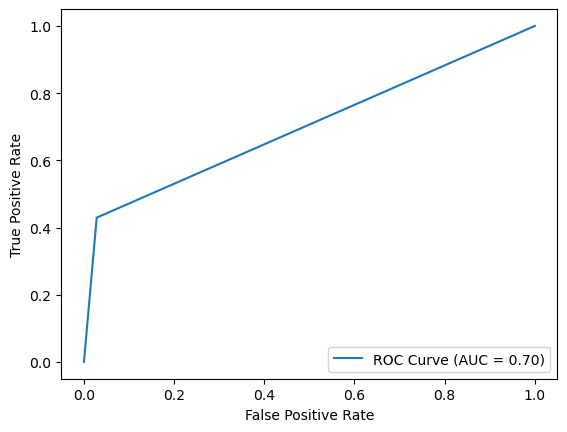

In [30]:
#predict
y_prediction=lr_model.predict(X_test)

#Rating
print(metrics.classification_report(y_test,y_prediction))
print("Model Accuracy: ",metrics.accuracy_score(y_test,y_prediction))

#confusion matrix
conf_mat=metrics.confusion_matrix(y_test,y_prediction)
sns.heatmap(conf_mat,annot=True,fmt='g')

#ROC Curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_prediction)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC Curve')
display.plot()
plt.show()

# Support Vector Machines

              precision    recall  f1-score   support

           0       0.90      0.98      0.93       849
           1       0.76      0.42      0.54       163

    accuracy                           0.89      1012
   macro avg       0.83      0.70      0.74      1012
weighted avg       0.88      0.89      0.87      1012

Model Accuracy:  0.8853754940711462


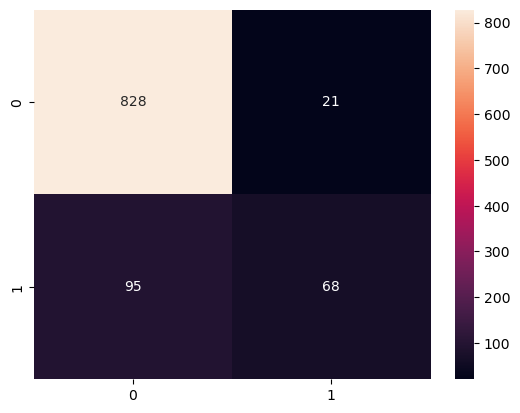

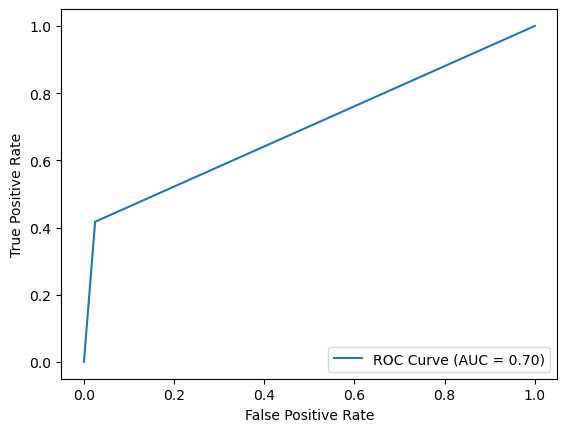

In [31]:
#model creation
svm_model=SVC()
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)

#model rating
print(metrics.classification_report(y_test,y_pred))
print("Model Accuracy: ",metrics.accuracy_score(y_test,y_pred))

#confusion matrix
con_mat=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot=True,fmt='g')

#ROC Curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC Curve')
display.plot()
plt.show()

# DecisionTreeClassifier Best Parametr Search

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1,15),
              'min_samples_split': np.arange(1,10),
              'min_samples_leaf': np.arange(1,10)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 5: Evaluate Models
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Best DecisionTreeClassifier Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

Best DecisionTreeClassifier Parameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9496047430830039


D:\Program Files\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
630 fits failed out of a total of 5670.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Program Files\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Program Files\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Program Files\Anaconda\Lib\site-

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       849
           1       0.84      0.83      0.84       163

    accuracy                           0.95      1012
   macro avg       0.91      0.90      0.90      1012
weighted avg       0.95      0.95      0.95      1012

Model Accuracy:  0.9476284584980237


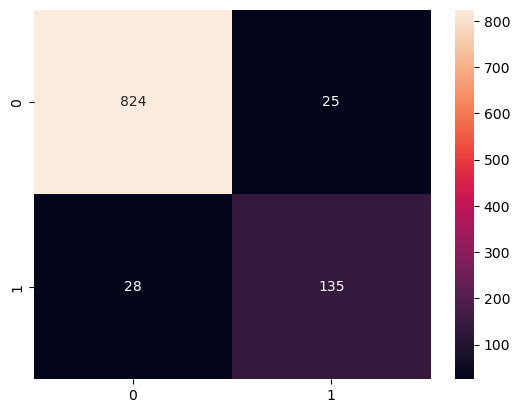

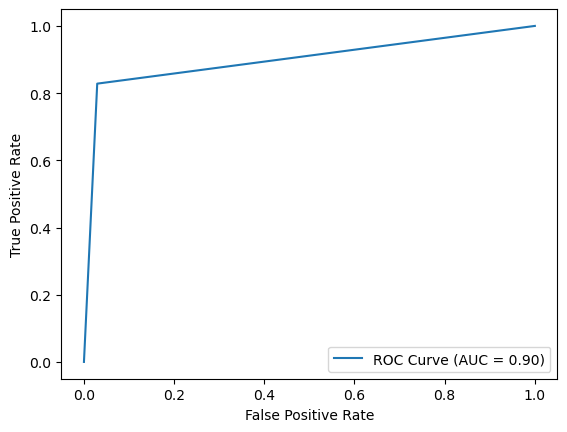

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      4246
           1       0.90      0.84      0.87       813

    accuracy                           0.96      5059
   macro avg       0.94      0.91      0.92      5059
weighted avg       0.96      0.96      0.96      5059



In [33]:
#model creating
tree_model=DecisionTreeClassifier(min_samples_split=2, max_depth=13)
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)

#model rating
print(metrics.classification_report(y_test,y_pred))
print("Model Accuracy: ",metrics.accuracy_score(y_test,y_pred))

#confusion matrix
conf_mat=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,fmt='g')

#ROC Curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC Curve')
display.plot()
plt.show()

#cross val 
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=tree_model,X=X,y=y,cv=5)

#Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y,predict))

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': np.arange(1,10),
              'max_depth': np.arange(1,15),
              'min_samples_leaf': np.arange(1,10),
              'min_samples_split':np.arange(1,10)
             }
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 5: Evaluate Models
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Best RandomForestClassifier parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

In [ ]:
#model preparing
rfc_model=RandomForestClassifier(n_estimators=9,max_depth=14)
rfc_model.fit(X_train,y_train)
y_pred=rfc_model.predict(X_test)

#model rating
print(metrics.classification_report(y_test,y_pred))
print("Model Accuracy: ",metrics.accuracy_score(y_test,y_pred))

#confusion matrix
conf_mat=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,fmt='g')
plt.show()

#ROC Curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC Curve')
display.plot()
plt.show()

#cross val 
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=tree_model,X=X,y=y,cv=5)
print("Classification Report: \n",classification_report(y,predict))

In [ ]:
#model preparing
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)

#model rating
print(metrics.classification_report(y_test,y_pred))
print("Model Accuracy: ",metrics.accuracy_score(y_test,y_pred))

#Con
con_mat=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot=True,fmt='g')
plt.show()

#ROC Curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC Curve')
display.plot()
plt.show()

#cross val 
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=xgb_model,X=X,y=y,cv=5)

#Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y,predict))

In [ ]:
plt.figure(figsize=(30,20))
cols=list(X_train)
plot_tree(tree_model,feature_names=cols,filled=True)
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

#model rating
print(classification_report(y_test,y_pred))
print("Model Accuracy: ",metrics.accuracy_score(y_test,y_pred))

#confusion matrix
conf_mat=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,fmt='g')
plt.show()

#ROC Curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC Curve')
display.plot()
plt.show()